In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df_00 = pd.read_csv('data/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
df_00.shape

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\orlah\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(1923515, 23)

In [3]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [4]:
df_00.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
columns_to_drop = ['Unnamed: 0', 'Case Number', 'IUCR','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location']

In [6]:
df_01 = df_00.drop(columns_to_drop, axis=1).dropna()
df_01.shape

(1892808, 13)

In [7]:
# convert dates to pandas datetime format
df_01.Date = pd.to_datetime(df_01.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
df_01.index = pd.DatetimeIndex(df_01.Date)

As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical columns, we will only keep the most frequent categories and then cast them to a categorical type.

In [8]:
df_01['Primary Type'].value_counts()[:16]

THEFT                         387707
BATTERY                       359137
CRIMINAL DAMAGE               217926
NARCOTICS                     207153
OTHER OFFENSE                 122195
ASSAULT                       119908
BURGLARY                      101052
MOTOR VEHICLE THEFT            96457
ROBBERY                        69803
CRIMINAL TRESPASS              57058
DECEPTIVE PRACTICE             54497
PROSTITUTION                   25156
WEAPONS VIOLATION              16868
OFFENSE INVOLVING CHILDREN     10241
PUBLIC PEACE VIOLATION          9984
SEX OFFENSE                     7967
Name: Primary Type, dtype: int64

In [9]:
df_01[['Y Coordinate','Latitude']] = df_01[['Y Coordinate','Latitude']].apply(pd.to_numeric)

In [10]:
df_01.loc[df_01['Primary Type'] == 'CRIM SEXUAL ASSAULT' , df_01.columns=='Primary Type'] = 'SEX OFFENSE'

In [11]:
loc_to_change  = list(df_01['Location Description'].value_counts()[20:].index)
desc_to_change = list(df_01['Description'].value_counts()[20:].index)
type_to_change = list(df_01['Primary Type'].value_counts()[16:].index)

df_01.loc[df_01['Location Description'].isin(loc_to_change) , df_01.columns=='Location Description'] = 'OTHER'
df_01.loc[df_01['Description'].isin(desc_to_change) , df_01.columns=='Description'] = 'OTHER'
df_01.loc[df_01['Primary Type'].isin(type_to_change) , df_01.columns=='Primary Type'] = 'OTHER'

In [12]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1892808 entries, 2003-03-01 00:00:00 to 2002-08-09 15:00:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 176.9+ MB


In [13]:
df_01.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Latitude,Longitude
Date,,,,,,,,,,,,,
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,9.0,1173974.0,1876757.0,41.817229,-87.637328
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,OTHER,RESIDENCE,False,False,22.0,1174948.0,1831051.0,41.691785,-87.635116
2001-01-01 11:00:00,4791194,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,SEX OFFENSE,OTHER,RESIDENCE,True,True,5.0,1182247.0,1829375.0,41.687020,-87.608445
2003-03-15 00:00:00,4679521,2003-03-15 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER,RESIDENCE PORCH/HALLWAY,False,False,22.0,1169911.0,1844832.0,41.729712,-87.653159
2003-01-01 00:00:00,4680124,2003-01-01 00:00:00,009XX S SPAULDING AVE,THEFT,OTHER,RESIDENCE,False,False,11.0,1154521.0,1895755.0,41.869772,-87.708180


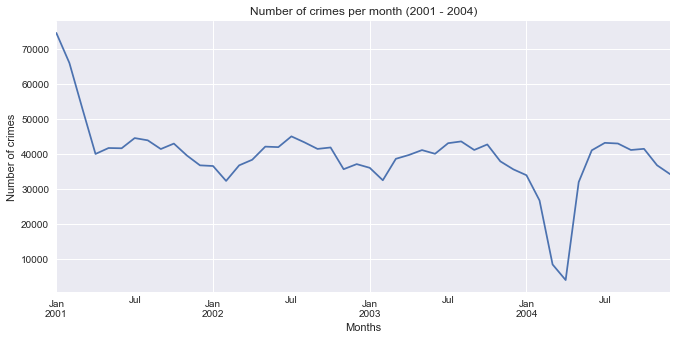

In [14]:
plt.figure(figsize=(11,5))
df_01.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2004)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

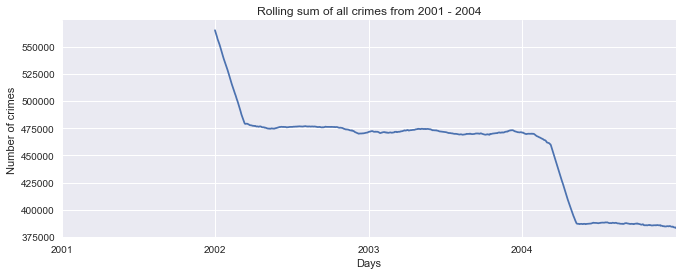

In [15]:
plt.figure(figsize=(11,4))
df_01.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2004')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

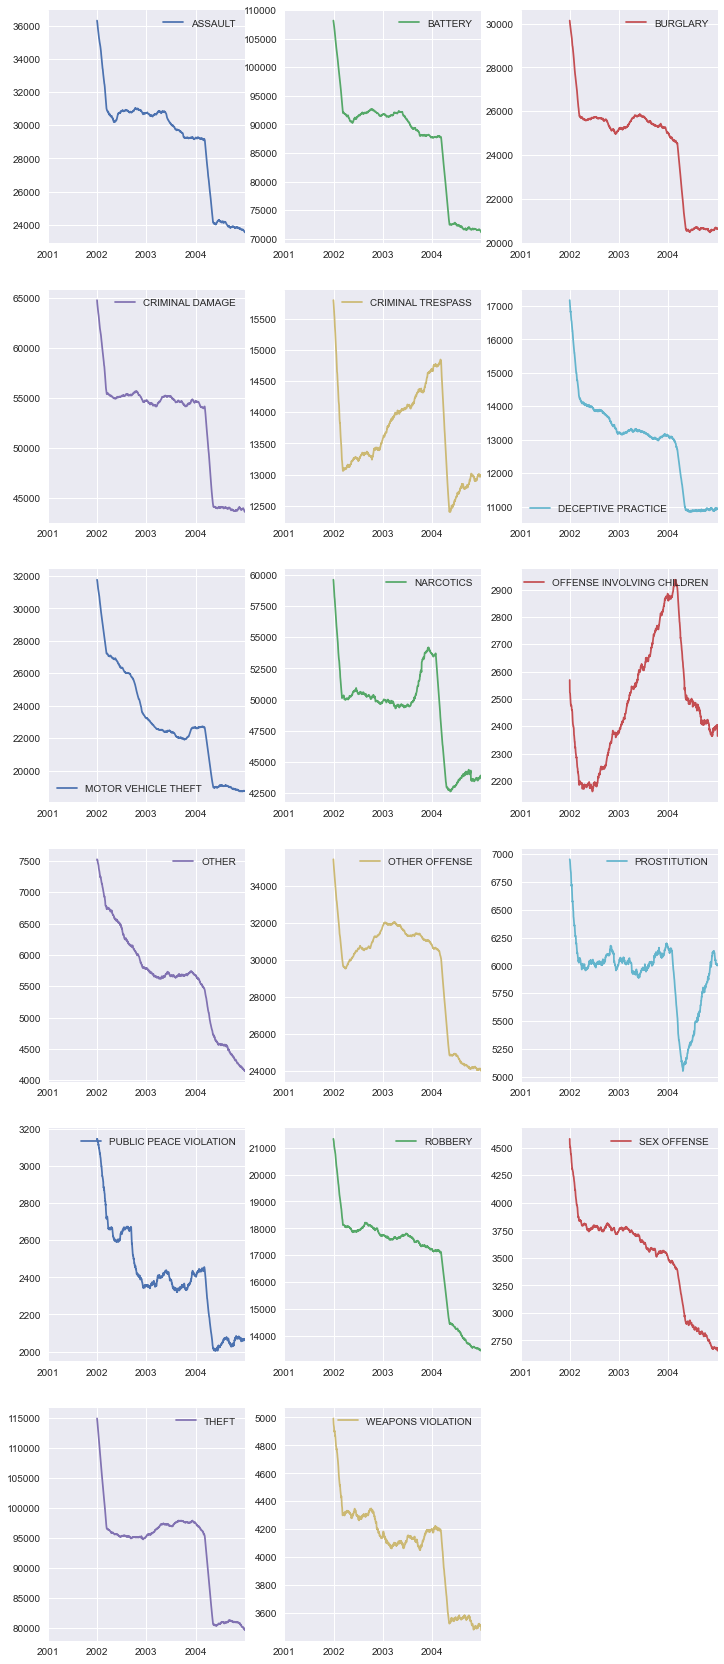

In [16]:
crimes_count_date = df_01.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df_01.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [17]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1892808 entries, 2003-03-01 00:00:00 to 2002-08-09 15:00:00
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Block                 object        
 3   Primary Type          object        
 4   Description           object        
 5   Location Description  object        
 6   Arrest                bool          
 7   Domestic              bool          
 8   District              float64       
 9   X Coordinate          float64       
 10  Y Coordinate          float64       
 11  Latitude              float64       
 12  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 176.9+ MB


In [18]:
# crimes_new = df_01[(df_01['Primary Type'] == 'SEX OFFENSE') | (df_01['Primary Type'] == 'HOMICIDE') | (df_01['Primary Type'] == 'ARSON')]

In [19]:
# crimes_new.shape

In [20]:
# ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']

In [21]:
df_00.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


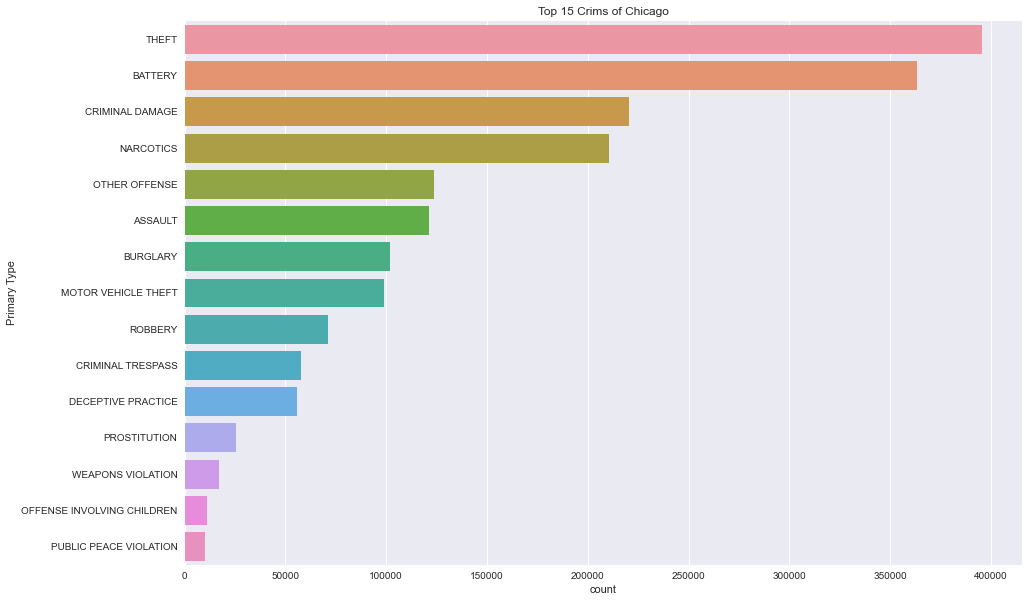

In [22]:
order_data = df_00['Primary Type'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=df_00,order=order_data)
plt.title('Top 15 Crims of Chicago')
plt.show()

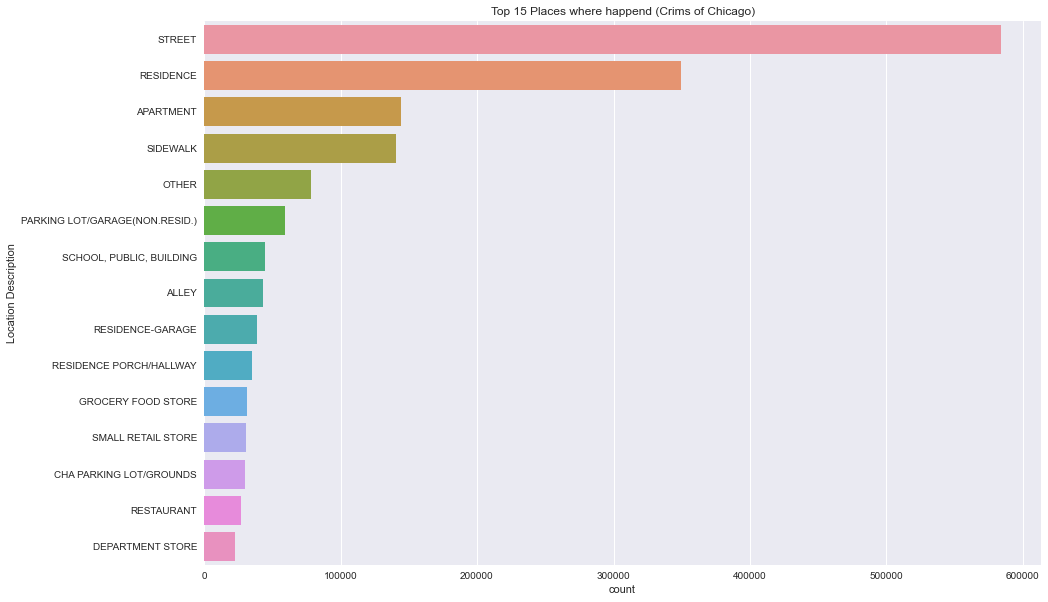

In [23]:
order_for_location = df_00['Location Description'].value_counts().iloc[:15].index
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=df_00,order=order_for_location)
plt.title('Top 15 Places where happend (Crims of Chicago)')
plt.show()